# [Question 4] Ensemble  Models

In [1]:
# Importing the libraries
import pandas as  pd

In [2]:
# Reading dataset into dataframe        
df = pd.read_csv('/kaggle/input/a2-datasets/transactions.csv')
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,1/12/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,9/12/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,9/12/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,9/12/11 12:50,4.15,12680.0,France
541908,581587,22138,BAKING SET 9 PIECE RETROSPOT,3,9/12/11 12:50,4.95,12680.0,France


In [3]:
df['Description'] = df.Description.astype('str')
df['Description'] = df.Description.str.strip()

In [5]:
# Getting shape of dataframe
df.shape

(541910, 8)

## Task 1: Remove rows with missing CustomerID

In [4]:
df = df.dropna(subset=['Customer ID'])
df = df[df['StockCode']!= 'POST']
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/10 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,1/12/10 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/10 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/10 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/10 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,9/12/11 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,9/12/11 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,9/12/11 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,9/12/11 12:50,4.15,12680.0,France


In [5]:
df.isna().sum()

Invoice        0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
Price          0
Customer ID    0
Country        0
dtype: int64

In [6]:
# Checking whether rows with missing ID have been dropped
df['Customer ID'].isna().sum()

0

## Task 2: Remove cancelled transactions

In [7]:
df['Customer ID'] = df['Customer ID'].astype(int)
df['Customer ID'] = df['Customer ID'].astype("category")

In [8]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

C:\Users\liu_y\AppData\Local\Temp\ipykernel_30048\3633860036.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.

  df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])


In [9]:
# Since cancelled transactions starts with C, rows that starts with C are removed
df = df.loc[df['Invoice'].str.startswith('C') == False]

In [10]:
#  Print to check 
df

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-01-12 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-01-12 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-01-12 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-01-12 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-01-12 08:26:00,3.39,17850,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-09-12 12:50:00,0.85,12680,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-09-12 12:50:00,2.10,12680,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-09-12 12:50:00,4.15,12680,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-09-12 12:50:00,4.15,12680,France


In [11]:
df['Description'].nunique()

3865

Further data cleaning

In [12]:
product_counts = df.groupby(['StockCode', 'Description'], as_index=False).size()

# Count the number of unique descriptions per StockCode
description_counts = df.groupby('StockCode')['Description'].nunique().reset_index()
description_counts.columns = ['StockCode', 'DescriptionCount']

# Filter StockCodes with more than 1 unique description
multi_description_stockcodes = description_counts[description_counts['DescriptionCount'] > 1]['StockCode']

# Filter the products DataFrame to include only these StockCodes
filtered_products = df[df['StockCode'].isin(multi_description_stockcodes)]

In [13]:
product_counts[product_counts.StockCode.isin(multi_description_stockcodes)].head(20)

,StockCode,Description,size
42,16156L,WRAP CAROUSEL,14
43,16156L,"WRAP, CAROUSEL",4
101,17107D,FLOWER FAIRY 5 DRAWER LINERS,21
102,17107D,FLOWER FAIRY 5 SUMMER DRAW LINERS,1
103,17107D,"FLOWER FAIRY,5 SUMMER B'DRAW LINERS",25
121,20622,VIP PASSPORT COVER,11
122,20622,VIPPASSPORT COVER,22
174,20725,LUNCH BAG RED RETROSPOT,1316
175,20725,LUNCH BAG RED SPOTTY,1
267,20914,SET/5 RED RETROSPOT LID GLASS BOWLS,783


Looking at the list, we observe the same stock code with varying descriptions. As such, these duplicates are removed so that one stock code would have one description only.

In [14]:
product_counts.drop_duplicates(subset='StockCode', keep='first', inplace=True)

In [15]:
# Correct the mapping of StockCode and Description
df1 = pd.merge(df,product_counts,on='StockCode', how='left',validate='many_to_one')
df1.drop('Description_x',axis=1,inplace=True)
df1.rename(columns={'Description_y':'Description'},inplace=True)
df1.head()

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID,Country,Description,size
0,536365,85123A,6,2010-01-12 08:26:00,2.55,17850,United Kingdom,CREAM HANGING HEART T-LIGHT HOLDER,7
1,536365,71053,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,WHITE METAL LANTERN,250
2,536365,84406B,8,2010-01-12 08:26:00,2.75,17850,United Kingdom,CREAM CUPID HEARTS COAT HANGER,244
3,536365,84029G,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,KNITTED UNION FLAG HOT WATER BOTTLE,326
4,536365,84029E,6,2010-01-12 08:26:00,3.39,17850,United Kingdom,RED WOOLLY HOTTIE WHITE HEART.,328


In [16]:
df1[['StockCode', 'Description']].sort_values(by='StockCode')

,StockCode,Description
7759,10002,INFLATABLE POLITICAL GLOBE
13891,10002,INFLATABLE POLITICAL GLOBE
5206,10002,INFLATABLE POLITICAL GLOBE
46426,10002,INFLATABLE POLITICAL GLOBE
80022,10002,INFLATABLE POLITICAL GLOBE
...,...,...
101201,M,Manual
107041,PADS,PADS TO MATCH ALL CUSHIONS
193856,PADS,PADS TO MATCH ALL CUSHIONS
255535,PADS,PADS TO MATCH ALL CUSHIONS


Based on the description given in the instructions, the StockCode should be a 5-digit integral number uniquely assigned to each distinct product. However, as observed from the table, there are several products with one more alphabet attached at the end. Since it represents different items, this is acceptable.

In [17]:
shortStockcode = df1[(df1.StockCode.str.len())<5].sort_values(by='StockCode')
shortStockcode

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID,Country,Description,size
1409,536540,C2,1,2010-01-12 14:05:00,50.000,14911,EIRE,CARRIAGE,133
297242,572069,C2,1,2011-10-20 13:24:00,50.000,14911,EIRE,CARRIAGE,133
119608,551950,C2,1,2011-05-05 11:38:00,50.000,14911,EIRE,CARRIAGE,133
290427,571425,C2,1,2011-10-17 12:41:00,50.000,14911,EIRE,CARRIAGE,133
130758,553203,C2,1,2011-05-15 16:10:00,50.000,14911,EIRE,CARRIAGE,133
...,...,...,...,...,...,...,...,...,...
143053,554933,M,2,2011-05-27 13:26:00,0.300,13232,United Kingdom,Manual,290
255535,568158,PADS,1,2011-09-25 12:22:00,0.000,16133,United Kingdom,PADS TO MATCH ALL CUSHIONS,4
107041,550193,PADS,1,2011-04-15 09:27:00,0.001,13952,United Kingdom,PADS TO MATCH ALL CUSHIONS,4
256732,568200,PADS,1,2011-09-25 14:58:00,0.001,16198,United Kingdom,PADS TO MATCH ALL CUSHIONS,4


In [18]:
shortStockcode['Description'].unique()

array(['CARRIAGE', 'DOTCOM POSTAGE', 'Manual',
       'PADS TO MATCH ALL CUSHIONS'], dtype=object)

As these are not relevant to items bought by a customer, these entries are removed.

In [19]:
df1 = df1.drop(df1[(df1.StockCode.str.len())<5].index).reset_index(drop=True)

In [20]:
df1 = df1.drop('size',axis=1)

In [23]:
df1.shape

(396382, 8)

In [24]:
df1.sort_values(by='StockCode').head(20)

,Invoice,StockCode,Quantity,InvoiceDate,Price,Customer ID,Country,Description
79927,546790,10002,6,2011-03-17 10:26:00,0.85,14713,United Kingdom,INFLATABLE POLITICAL GLOBE
109108,550452,10002,1,2011-04-18 12:56:00,0.85,14525,United Kingdom,INFLATABLE POLITICAL GLOBE
11368,537770,10002,12,2010-08-12 12:24:00,0.85,15529,United Kingdom,INFLATABLE POLITICAL GLOBE
31,536370,10002,48,2010-01-12 08:45:00,0.85,12583,France,INFLATABLE POLITICAL GLOBE
95801,548714,10002,2,2011-03-04 15:07:00,0.85,17337,United Kingdom,INFLATABLE POLITICAL GLOBE
47100,542735,10002,12,2011-01-31 15:36:00,0.85,12681,France,INFLATABLE POLITICAL GLOBE
95339,548702,10002,4,2011-03-04 11:36:00,0.85,17085,United Kingdom,INFLATABLE POLITICAL GLOBE
70335,545637,10002,2,2011-04-03 12:16:00,0.85,15514,United Kingdom,INFLATABLE POLITICAL GLOBE
7748,537227,10002,24,2010-06-12 08:42:00,0.85,17677,United Kingdom,INFLATABLE POLITICAL GLOBE
94346,548606,10002,120,2011-01-04 11:10:00,0.85,12731,France,INFLATABLE POLITICAL GLOBE


In [21]:
for i in df1.StockCode:
    if i[0].isdigit() == False:
        print(i)

BANK CHARGES

BANK CHARGES

BANK CHARGES

BANK CHARGES

BANK CHARGES

BANK CHARGES

BANK CHARGES

BANK CHARGES

BANK CHARGES

BANK CHARGES

BANK CHARGES

BANK CHARGES


In [22]:
df1 = df1.drop(df1[df1['StockCode'] == 'BANK CHARGES'].index).reset_index(drop=True)

## Task 3: Split df

In [23]:
# Using .loc to filter out rows according to the date
df_historical = df1.loc[df1['InvoiceDate']<'2011-06-01']
df_historical.shape

(158048, 8)

In [24]:
df_future = df1.loc[df1['InvoiceDate']>='2011-06-01']
df_future.shape

(238322, 8)

## Task 4: Create new df

In [25]:
# To get df_train, unique customer IDs are extracted as there are repeated IDs due to multiple transactions.
df_train = pd.DataFrame(df_historical['Customer ID'].unique(), columns=['Customer ID'])
df_train

,Customer ID
0,17850
1,13047
2,12583
3,13748
4,15100
...,...
2856,12367
2857,13079
2858,14629
2859,15274


In [26]:
# Creating the target column by checking if the customer ID is in df_future since it contains invoice dates on or later than 01 June 2011
df_train['target'] = df_train['Customer ID'].isin(df_future['Customer ID']).astype(int)

## Task 5: Generate features

In [27]:
# Creating the feature column by calculating the total amount of historical transactions for each customer ID
df_historical['Total'] = df_historical['Price'] * df_historical['Quantity']
total_amt = df_historical.groupby('Customer ID')['Total'].sum().reset_index()
total_amt.rename(columns={'Total': 'Total amount of the historical transactions'}, inplace=True)

# Merge this aggregated data with df_train
df_train = df_train.merge(total_amt, on='Customer ID', how='left')

# Creating the feature column for total number of historical transactions for each customer ID
invoice_counts = df_historical.groupby('Customer ID')['Invoice'].nunique()
df_train = df_train.merge(invoice_counts, on='Customer ID', how='left')
df_train.rename(columns={'Invoice': 'Total number of historical transactions'}, inplace=True)

C:\Users\liu_y\AppData\Local\Temp\ipykernel_30048\3368246472.py:2: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_historical['Total'] = df_historical['Price'] * df_historical['Quantity']

C:\Users\liu_y\AppData\Local\Temp\ipykernel_30048\3368246472.py:3: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

  total_amt = df_historical.groupby('Customer ID')['Total'].sum().reset_index()

C:\Users\liu_y\AppData\Local\Temp\ipykernel_30048\3368246472.py:10: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version o

In [28]:
item_counts = df_historical.groupby('Customer ID')['StockCode'].nunique()
df_train = df_train.merge(item_counts, on='Customer ID', how='left')
df_train.rename(columns={'StockCode': 'Total number of unique items bought'}, inplace=True)

C:\Users\liu_y\AppData\Local\Temp\ipykernel_30048\2777360795.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

  item_counts = df_historical.groupby('Customer ID')['StockCode'].nunique()


In [29]:
df_train.sort_values(by='Total amount of the historical transactions').head(10)

,Customer ID,target,Total amount of the historical transactions,Total number of historical transactions,Total number of unique items bought
2251,16446,1,2.90,1,2
1313,16738,0,3.75,1,1
2844,13685,1,5.48,1,4
1249,16405,1,6.85,1,3
2384,15863,1,9.20,1,2
2440,16498,1,9.75,1,1
2490,17788,1,11.75,1,2
1956,17956,0,12.75,1,1
1752,17763,0,15.00,1,1
2745,17193,1,16.54,1,2


### Feature 1: Country

In [30]:
df_historical['Country'].value_counts()

Country
United Kingdom          142097
Germany                   3331
France                    3322
EIRE                      2398
Switzerland                900
Netherlands                860
Spain                      823
Belgium                    754
Australia                  469
Portugal                   431
Finland                    331
Italy                      321
Poland                     260
Channel Islands            235
Norway                     231
Cyprus                     193
Japan                      164
Sweden                     156
Austria                    110
Singapore                  108
Iceland                     82
United Arab Emirates        67
Denmark                     67
Greece                      54
USA                         54
Israel                      50
Lebanon                     45
Lithuania                   35
Brazil                      32
European Community          29
Czech Republic              15
Canada                      11


In [31]:
df_historical['Country_encoded'] = [1 if x == 'United Kingdom' else 0 for x in df_historical['Country']]

C:\Users\liu_y\AppData\Local\Temp\ipykernel_30048\2720988243.py:1: SettingWithCopyWarning: 

A value is trying to be set on a copy of a slice from a DataFrame.

Try using .loc[row_indexer,col_indexer] = value instead



See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  df_historical['Country_encoded'] = [1 if x == 'United Kingdom' else 0 for x in df_historical['Country']]


In [32]:
df_train = df_train.merge(df_historical[['Customer ID', 'Country_encoded']].drop_duplicates(), on='Customer ID', how='left')

In [33]:
df_train # Print to check

,Customer ID,target,Total amount of the historical transactions,Total number of historical transactions,Total number of unique items bought,Country_encoded
0,17850,0,5391.21,34,21,1
1,13047,1,2119.61,7,72,1
2,12583,1,1187.82,2,37,0
3,13748,1,718.85,4,18,1
4,15100,1,700.80,2,1,1
...,...,...,...,...,...,...
2856,12367,0,150.90,1,10,0
2857,13079,1,30.00,1,1,1
2858,14629,1,354.18,1,66,1
2859,15274,1,332.58,1,22,1


### Feature 2: Time interval between purchase (Frequency)

In [34]:
df_historical = df_historical.sort_values(by=['Customer ID', 'InvoiceDate'])
df_historical['Avg Purchase Interval'] = df_historical.groupby('Customer ID')['InvoiceDate'].diff().dt.days

C:\Users\liu_y\AppData\Local\Temp\ipykernel_30048\1016517401.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

  df_historical['Avg Purchase Interval'] = df_historical.groupby('Customer ID')['InvoiceDate'].diff().dt.days


In [35]:
latest_intervals = df_historical.groupby('Customer ID').agg({'Avg Purchase Interval': 'mean'}).reset_index()
mean_purchase_interval = latest_intervals['Avg Purchase Interval'].mean()
df_train = df_train.merge(latest_intervals, on='Customer ID', how='left')
df_train = df_train.fillna({'Avg Purchase Interval': mean_purchase_interval})

C:\Users\liu_y\AppData\Local\Temp\ipykernel_30048\3248952906.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

  latest_intervals = df_historical.groupby('Customer ID').agg({'Avg Purchase Interval': 'mean'}).reset_index()


### Feature 3: Latest Purchase Date ie. how long ago since last purchase (Recency)

In [36]:
recency = df_historical.groupby('Customer ID').agg({'InvoiceDate': 'max'}).reset_index()
recency['Recency'] = (pd.to_datetime('06-01-2011')-recency['InvoiceDate']).dt.days
recency.drop('InvoiceDate', axis=1, inplace=True)

C:\Users\liu_y\AppData\Local\Temp\ipykernel_30048\702903428.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.

  recency = df_historical.groupby('Customer ID').agg({'InvoiceDate': 'max'}).reset_index()


In [37]:
# recency = df_historical.groupby('Customer ID').agg({'InvoiceDate': 'max'}).reset_index()
# recency['Recency'] = (recency['InvoiceDate'] - recency['InvoiceDate']).dt.days
df_train = df_train.merge(recency, on='Customer ID', how='left')
df_train 

,Customer ID,target,Total amount of the historical transactions,Total number of historical transactions,Total number of unique items bought,Country_encoded,Avg Purchase Interval,Recency
0,17850,0,5391.21,34,21,1,0.101351,473.0
1,13047,1,2119.61,7,72,1,4.214953,53.0
2,12583,1,1187.82,2,37,0,13.405405,8.0
3,13748,1,718.85,4,18,1,25.315789,22.0
4,15100,1,700.80,2,1,1,212.000000,292.0
...,...,...,...,...,...,...,...,...
2856,12367,0,150.90,1,10,0,0.000000,19.0
2857,13079,1,30.00,1,1,1,2.471093,19.0
2858,14629,1,354.18,1,66,1,0.000000,19.0
2859,15274,1,332.58,1,22,1,0.000000,19.0


### Feature 4: Average Purchase per transaction

In [38]:
df_train['Avg_purchase'] = df_train['Total amount of the historical transactions'] / df_train['Total number of historical transactions']
df_train

,Customer ID,target,Total amount of the historical transactions,Total number of historical transactions,Total number of unique items bought,Country_encoded,Avg Purchase Interval,Recency,Avg_purchase
0,17850,0,5391.21,34,21,1,0.101351,473.0,158.565000
1,13047,1,2119.61,7,72,1,4.214953,53.0,302.801429
2,12583,1,1187.82,2,37,0,13.405405,8.0,593.910000
3,13748,1,718.85,4,18,1,25.315789,22.0,179.712500
4,15100,1,700.80,2,1,1,212.000000,292.0,350.400000
...,...,...,...,...,...,...,...,...,...
2856,12367,0,150.90,1,10,0,0.000000,19.0,150.900000
2857,13079,1,30.00,1,1,1,2.471093,19.0,30.000000
2858,14629,1,354.18,1,66,1,0.000000,19.0,354.180000
2859,15274,1,332.58,1,22,1,0.000000,19.0,332.580000


### Feature 5: Average number of items bought per transaction

In [39]:
df_train['Avg_items_count'] = df_train['Total number of historical transactions'] / df_train['Total number of unique items bought']
df_train

,Customer ID,target,Total amount of the historical transactions,Total number of historical transactions,Total number of unique items bought,Country_encoded,Avg Purchase Interval,Recency,Avg_purchase,Avg_items_count
0,17850,0,5391.21,34,21,1,0.101351,473.0,158.565000,1.619048
1,13047,1,2119.61,7,72,1,4.214953,53.0,302.801429,0.097222
2,12583,1,1187.82,2,37,0,13.405405,8.0,593.910000,0.054054
3,13748,1,718.85,4,18,1,25.315789,22.0,179.712500,0.222222
4,15100,1,700.80,2,1,1,212.000000,292.0,350.400000,2.000000
...,...,...,...,...,...,...,...,...,...,...
2856,12367,0,150.90,1,10,0,0.000000,19.0,150.900000,0.100000
2857,13079,1,30.00,1,1,1,2.471093,19.0,30.000000,1.000000
2858,14629,1,354.18,1,66,1,0.000000,19.0,354.180000,0.015152
2859,15274,1,332.58,1,22,1,0.000000,19.0,332.580000,0.045455


In [40]:
df_train.describe()

,target,Total amount of the historical transactions,Total number of historical transactions,Total number of unique items bought,Country_encoded,Avg Purchase Interval,Recency,Avg_purchase,Avg_items_count
count,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000,2861.000000
mean,0.703950,1247.581377,2.721776,43.409647,0.909123,2.471093,77.754282,404.878632,0.141797
std,0.456593,4461.971154,4.004042,59.362039,0.287485,11.818732,88.947302,1537.186437,0.247266
min,0.000000,2.900000,1.000000,1.000000,0.000000,0.000000,0.000000,2.900000,0.003817
25%,0.000000,244.080000,1.000000,12.000000,1.000000,0.000000,19.000000,169.875000,0.040816
50%,1.000000,465.080000,2.000000,26.000000,1.000000,0.140845,53.000000,292.035000,0.066667
75%,1.000000,1054.830000,3.000000,54.000000,1.000000,2.030303,106.000000,426.600000,0.125000
max,1.000000,111320.520000,80.000000,976.000000,1.000000,420.000000,504.000000,77183.600000,4.000000


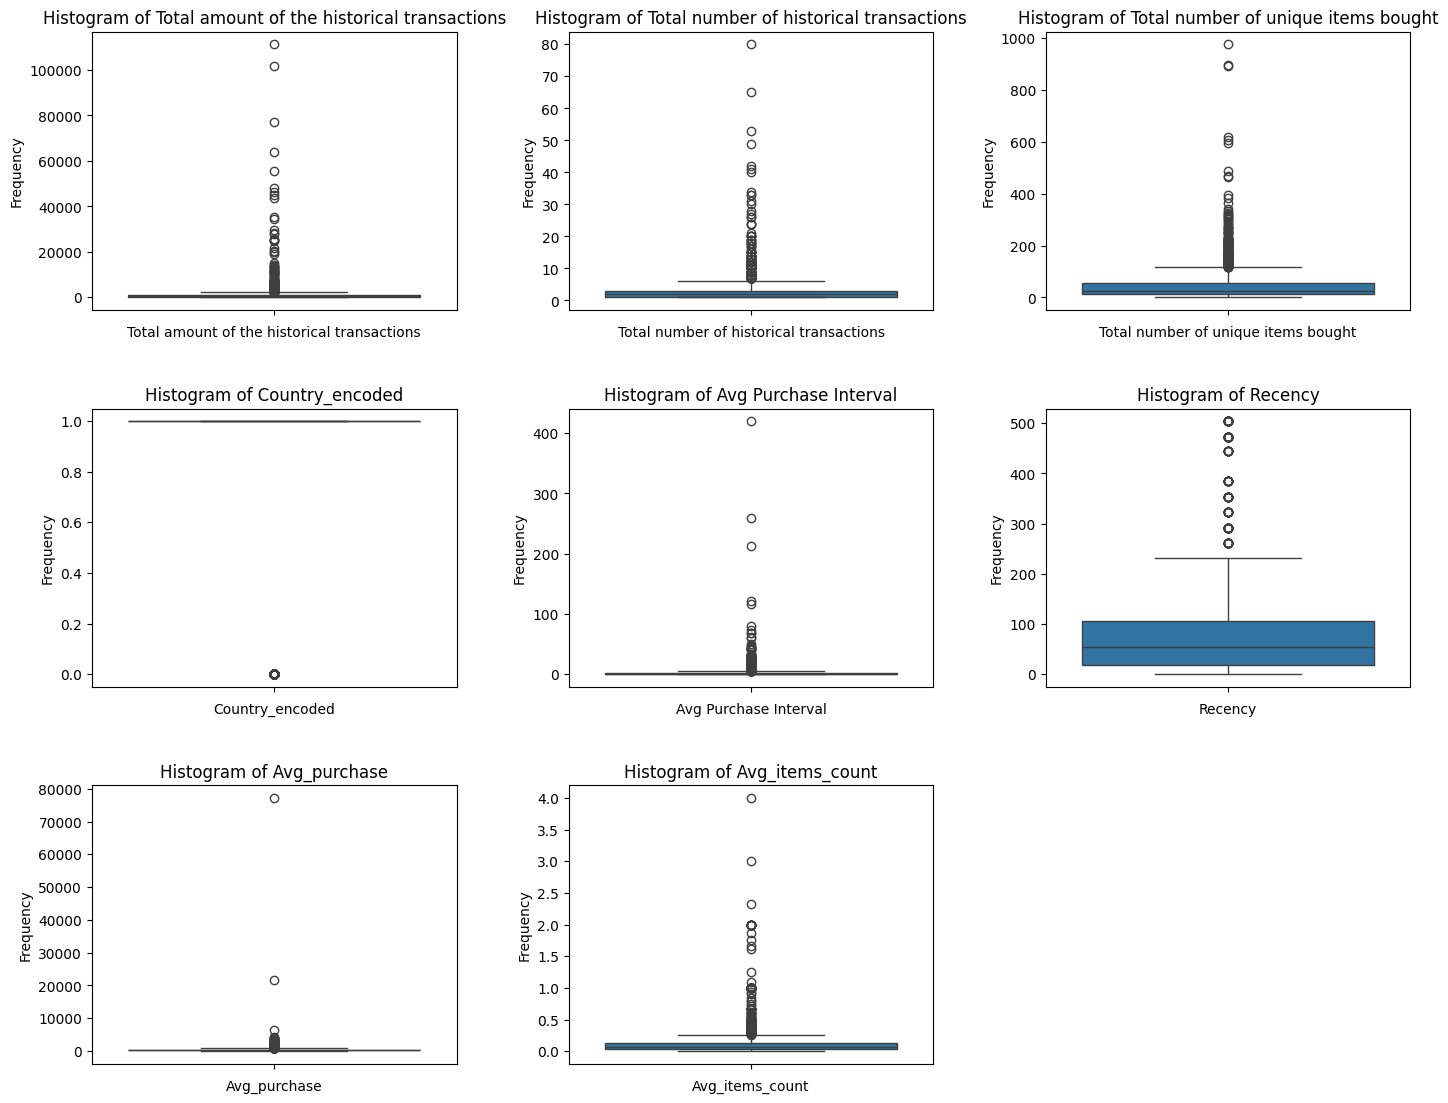

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np

# Assuming df_train is your DataFrame and it contains numerical data
# Select only numeric columns and start from the second column
num_cols = df_train.select_dtypes(include=[np.number]).columns[1:]  # Skip the first column

# Define the layout size
num_plots = len(num_cols)
num_rows = int(np.ceil(num_plots / 3))  # Arrange plots in 3 columns

fig, axes = plt.subplots(nrows=num_rows, ncols=3, figsize=(15, num_rows * 4))  # Adjust the size as necessary
fig.tight_layout(pad=5.0)  # Add space between plots

# Flatten the axes array for easier iteration
axes = axes.flatten()

# Plot each column's data in a subplot
for i, col in enumerate(num_cols):
    sns.boxplot(df_train[col],ax=axes[i])
    axes[i].set_title(f'Histogram of {col}')
    axes[i].set_xlabel(col)  # Set the x-axis label to the column name
    axes[i].set_ylabel('Frequency')  # Set the y-axis label

# Turn off axes that aren't used (if any)
for ax in axes[len(num_cols):]:
    ax.axis('off')

plt.show()


From the box plots and data summary, we observe outliers. These transactions seem to be a result of extreme purchase by a customer. Thus, we will remove such outliers as it may affect the model.

In [42]:
q_1 = df_train['Total amount of the historical transactions'].quantile(0.25)
q_3  = df_train['Total amount of the historical transactions'].quantile(0.75)
iqr = q_3 - q_1
upper = q_3 + 1.5 * iqr
lower = q_1 - 1.5 * iqr
df_train_filtered = df_train[(df_train['Total amount of the historical transactions'] > lower) & (df_train['Total amount of the historical transactions'] < upper)]

In [43]:
df_train_filtered.describe()

,target,Total amount of the historical transactions,Total number of historical transactions,Total number of unique items bought,Country_encoded,Avg Purchase Interval,Recency,Avg_purchase,Avg_items_count
count,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000,2583.000000
mean,0.679443,587.873686,1.973287,34.262098,0.915602,2.417994,83.332946,317.559242,0.138550
std,0.466781,497.684329,1.530627,34.586792,0.278038,12.211993,90.892570,236.344589,0.243001
min,0.000000,2.900000,1.000000,1.000000,0.000000,0.000000,0.000000,2.900000,0.005848
25%,0.000000,222.465000,1.000000,11.000000,1.000000,0.000000,23.000000,163.250000,0.040678
50%,1.000000,405.000000,1.000000,23.000000,1.000000,0.000000,60.000000,267.885000,0.066667
75%,1.000000,808.945000,2.000000,47.000000,1.000000,1.904923,109.000000,385.810000,0.125000
max,1.000000,2269.770000,19.000000,342.000000,1.000000,420.000000,504.000000,2221.020000,4.000000


## Task 6: Split df_train

In [44]:
from sklearn import model_selection

x = df_train.iloc[:,2:9]
y = df_train.iloc[:,1]

X_train, X_test, y_train, y_test = model_selection.train_test_split(x, y, test_size=0.2, random_state=2024)

In [45]:
df_train['target'].value_counts() 

target
1    2014
0     847
Name: count, dtype: int64

From the above, we observe an imbalance in class. Hence, we utilise SMOTE to balance this difference.

In [46]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

### Task 7: Train ensemble models (6 points)

### Decision Tree

In [47]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
import numpy as np
from sklearn import tree, model_selection, preprocessing, ensemble
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, roc_curve, auc

parameters = [
    {'criterion' :['gini', 'entropy'],
    'n_estimators': [25, 50, 100, 150], 
    'max_features': ['sqrt', 'log2', None], 
    'max_depth': [3, 6, 9], 
    'max_leaf_nodes': [3, 6, 9, 15]}
]

In [81]:
rs_clf = RandomizedSearchCV(
    ensemble.RandomForestClassifier(), 
    parameters, 
    cv=model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=2024)
)

rs_clf.fit(X_train_res, y_train_res)
print('best score:', rs_clf.best_score_) # slightly worse than gridsearch
print('best parameters: ', rs_clf.best_params_)
print(classification_report(y_test, y_pred))

best score: 0.6866305790050575

best parameters:  {'n_estimators': 150, 'max_leaf_nodes': 15, 'max_features': 'log2', 'max_depth': 9, 'criterion': 'entropy'}

              precision    recall  f1-score   support



           0       0.41      0.54      0.47       172

           1       0.77      0.66      0.71       401



    accuracy                           0.63       573

   macro avg       0.59      0.60      0.59       573

weighted avg       0.66      0.63      0.64       573




In [83]:
rd_clf = model_selection.GridSearchCV(
    ensemble.RandomForestClassifier(), 
    parameters, 
    cv=model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=2024)
)

rd_clf.fit(X_train_res, y_train_res)
print('best score:', rd_clf.best_score_)
print('best parameters: ', rd_clf.best_params_)
print(classification_report(y_test, y_pred))

best score: 0.6897246312712728

best parameters:  {'criterion': 'gini', 'max_depth': 9, 'max_features': None, 'max_leaf_nodes': 15, 'n_estimators': 150}


As the score for GridSearch appears to be better, we will use those parameters for our test data.

In [48]:
rforest = ensemble.RandomForestClassifier(n_estimators=150, max_features='log2', max_depth= 9, criterion='entropy', max_leaf_nodes= 15, oob_score=True)
rforest.fit(X_train_res, y_train_res) 

RandomForestClassifier(criterion='entropy', max_depth=9, max_features='log2',
                       max_leaf_nodes=15, n_estimators=150, oob_score=True)

In [58]:
print('Accuracy of Random Forest classifier on training set: {:.3f}'
       .format(rforest.score(X_train_res, y_train_res)))
print('Accuracy of Random Forest classifier on test set: {:.3f}'
       .format(rforest.score(X_test[X_train_res.columns], y_test)))
y_pred = rforest.predict(X_test)
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Accuracy of Random Forest classifier on training set: 0.701

Accuracy of Random Forest classifier on test set: 0.625

              precision    recall  f1-score   support



           0       0.43      0.71      0.53       172

           1       0.83      0.59      0.69       401



    accuracy                           0.62       573

   macro avg       0.63      0.65      0.61       573

weighted avg       0.71      0.62      0.64       573



0.6489155019428173


array([[122,  50],
       [165, 236]], dtype=int64)

### Extra Tree

In [62]:
# Define the model
extra_trees = ExtraTreesClassifier(random_state=42)

# Set up the parameter grid
et_params = {
    'criterion': ['gini', 'entropy','log_loss'],           # Function to measure the quality of a split
    'n_estimators': [50, 100, 200],                        # Number of trees in the forest
    'max_features': ['sqrt', 'log2'],                      # Number of features to consider at every split
    'max_depth': [None, 10, 20, 30],                       # Maximum number of levels in each decision tree
    'min_samples_split': [2, 5, 10],                       # Minimum number of data points placed in a node before the node is split
    'min_samples_leaf': [1, 2, 4]                          # Minimum number of data points allowed in a leaf node
}

# Initialize GridSearchCV
et_gs = RandomizedSearchCV(extra_trees, 
    et_params, 
    cv=model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=2024),
    scoring = 'roc_auc',
    n_jobs=-1,
    verbose=2)

# Perform the search
et_gs.fit(X_train_res, y_train_res)

print('best score:', et_gs.best_score_) # slightly worse than gridsearch
print('best parameters: ', et_gs.best_params_)
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

Fitting 10 folds for each of 10 candidates, totalling 100 fits

best score: 0.8235660727919256

best parameters:  {'n_estimators': 50, 'min_samples_split': 10, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None, 'criterion': 'log_loss'}

              precision    recall  f1-score   support



           0       0.37      0.42      0.40       172

           1       0.74      0.70      0.72       401



    accuracy                           0.61       573

   macro avg       0.56      0.56      0.56       573

weighted avg       0.63      0.61      0.62       573



0.5600896015774517


In [70]:
et = ExtraTreesClassifier(n_estimators=50, max_features='sqrt', max_depth= 10, criterion='log_loss', min_samples_split= 10, min_samples_leaf= 1, random_state=2024)
et.fit(X_train_res, y_train_res)

ExtraTreesClassifier(criterion='log_loss', max_depth=10, min_samples_split=10,
                     n_estimators=50, random_state=2024)

In [80]:
print('Accuracy of Extra Tree classifier on training set: {:.3f}'
       .format(et.score(X_train_res, y_train_res)))
print('Accuracy of Extra Tree classifier on test set: {:.3f}'
       .format(et.score(X_test[X_train_res.columns], y_test)))
y_pred = et.predict(X_test)
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Accuracy of Extra Tree classifier on training set: 0.696

Accuracy of Extra Tree classifier on test set: 0.630

              precision    recall  f1-score   support



           0       0.43      0.70      0.53       172

           1       0.82      0.60      0.69       401



    accuracy                           0.63       573

   macro avg       0.63      0.65      0.61       573

weighted avg       0.71      0.63      0.65       573



0.6509960563707011


array([[121,  51],
       [161, 240]], dtype=int64)

### Gradient Boost

In [66]:
g_params = { 'loss' : ['exponential', 'log_loss'],
'criterion' : ['friedman_mse', 'squared_error'],
'n_estimators' : [5,10,15,20],
'max_depth' : [2, 3, 5, 10, 15],
'min_samples_leaf' : [1, 2, 4, 6, 8] ,
'min_samples_split' : [2, 4, 6, 10],
'max_features' : ['sqrt', 'log2', None]}

In [67]:
rs_clf = RandomizedSearchCV(
    ensemble.GradientBoostingClassifier(), 
    g_params, 
    cv=model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=2024),
    scoring = 'roc_auc',
    n_jobs=-1,
    verbose=2
)
rs_clf.fit(X_train_res, y_train_res)
print('best score:', rs_clf.best_score_) # slightly worse than gridsearch
print('best parameters: ', rs_clf.best_params_)
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))

Fitting 10 folds for each of 10 candidates, totalling 100 fits

best score: 0.8100076752678247

best parameters:  {'n_estimators': 15, 'min_samples_split': 4, 'min_samples_leaf': 6, 'max_features': 'sqrt', 'max_depth': 15, 'loss': 'log_loss', 'criterion': 'friedman_mse'}

              precision    recall  f1-score   support



           0       0.37      0.42      0.40       172

           1       0.74      0.70      0.72       401



    accuracy                           0.61       573

   macro avg       0.56      0.56      0.56       573

weighted avg       0.63      0.61      0.62       573



0.5600896015774517


In [69]:
rd_clf = model_selection.GridSearchCV(
    ensemble.GradientBoostingClassifier(), 
    g_params,
    cv=model_selection.StratifiedKFold(n_splits=10, shuffle=True, random_state=2024)
)

rd_clf.fit(X_train, y_train)
print('best score:', rd_clf.best_score_)
print('best parameters: ', rd_clf.best_params_)
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

best score: 0.7080364667126331

best parameters:  {'criterion': 'squared_error', 'loss': 'log_loss', 'max_depth': 2, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 10, 'n_estimators': 20}

              precision    recall  f1-score   support



           0       0.37      0.42      0.40       172

           1       0.74      0.70      0.72       401



    accuracy                           0.61       573

   macro avg       0.56      0.56      0.56       573

weighted avg       0.63      0.61      0.62       573



0.5600896015774517


array([[ 73,  99],
       [122, 279]], dtype=int64)

In [76]:
gboost = ensemble.GradientBoostingClassifier(n_estimators=15, max_features='log2', max_depth= 15, criterion='friedman_mse', min_samples_split= 4, min_samples_leaf= 6, random_state=2024)
gboost.fit(X_train_res, y_train_res)

GradientBoostingClassifier(max_depth=15, max_features='log2',
                           min_samples_leaf=6, min_samples_split=4,
                           n_estimators=15, random_state=2024)

In [77]:
print('Accuracy of Gradient Boosting classifier on training set: {:.3f}'
       .format(gboost.score(X_train_res, y_train_res)))
print('Accuracy of Gradient Boosting classifier on test set: {:.3f}'
       .format(gboost.score(X_test[X_train_res.columns], y_test)))
y_pred = gboost.predict(X_test)
print(classification_report(y_test, y_pred))
print(roc_auc_score(y_test, y_pred))
confusion_matrix(y_test, y_pred)

Accuracy of Gradient Boosting classifier on training set: 0.927

Accuracy of Gradient Boosting classifier on test set: 0.634

              precision    recall  f1-score   support



           0       0.42      0.54      0.47       172

           1       0.77      0.67      0.72       401



    accuracy                           0.63       573

   macro avg       0.59      0.61      0.59       573

weighted avg       0.67      0.63      0.64       573



0.6070071913240156


array([[ 93,  79],
       [131, 270]], dtype=int64)

## Task 8: List the 5 most important features for Random Forest classifier. (2 points)

In [85]:
feature_importances = pd.DataFrame(rforest.feature_importances_, index = X_train_res.columns, columns=['Importance']).sort_values('Importance', ascending=False)
feature_importances.head(5)

,Importance
Total number of historical transactions,0.314074
Total amount of the historical transactions,0.238692
Total number of unique items bought,0.121680
Avg Purchase Interval,0.119862
Recency,0.097273


### Task 9: Build a stacking model based on the above classifiers. You are free to choose the meta classifier. (2 points)

In [78]:
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import StackingClassifier, VotingClassifier
# Define base models
base_models = [
    ('rf', ensemble.RandomForestClassifier(n_estimators=25, max_features=None, max_depth= 6, criterion='gini', max_leaf_nodes= 15, oob_score=True)),
    ('et',ExtraTreesClassifier(n_estimators=50, max_features='sqrt', max_depth= 10, criterion='log_loss', min_samples_split= 10, min_samples_leaf= 1, random_state=2024)),
    ('gboost', ensemble.GradientBoostingClassifier(n_estimators=15, max_features='log2', max_depth= 15, criterion='friedman_mse', min_samples_split= 4, min_samples_leaf= 6, random_state=2024))
]

# Define the meta-model
meta_model = RandomForestClassifier(random_state=2024)

# Initialize the Stacking Classifier
stacking_model = StackingClassifier(estimators=base_models, final_estimator=meta_model, cv=5)

In [79]:
stacking_model.fit(X_train_res, y_train_res)

StackingClassifier(cv=5,
                   estimators=[('rf',
                                RandomForestClassifier(max_depth=6,
                                                       max_features=None,
                                                       max_leaf_nodes=15,
                                                       n_estimators=25,
                                                       oob_score=True)),
                               ('et',
                                ExtraTreesClassifier(criterion='log_loss',
                                                     max_depth=10,
                                                     min_samples_split=10,
                                                     n_estimators=50,
                                                     random_state=2024)),
                               ('gboost',
                                GradientBoostingClassifier(max_depth=15,
                                                           max_features='log2',
                                                           min_samples_leaf=6,
                                                           min_samples_split=4,
                                                           n_estimators=15,
                                                           random_state=2024))],
                   final_estimator=RandomForestClassifier(random_state=2024))

### Task 10: Report the model performance in terms of precision, recall, F1, and ROC_AUC on the train and test sets for the individual classifiers and the meta classifier. (2 points)

In [74]:
from sklearn import metrics
# Make predictions
predictions = stacking_model.predict(X_test)

# Calculate accuracy
accuracy = metrics.accuracy_score(y_test, predictions)
roc_auc = roc_auc_score(y_test, y_pred)
print(f'Accuracy of the Stacking Classifier: {accuracy}')
print(classification_report(y_test, y_pred))
print(f'ROC AUC of the Stacking Classifier: {roc_auc}')

Accuracy of the Stacking Classifier: 0.5933682373472949

              precision    recall  f1-score   support



           0       0.43      0.70      0.53       172

           1       0.82      0.60      0.69       401



    accuracy                           0.63       573

   macro avg       0.63      0.65      0.61       573

weighted avg       0.71      0.63      0.65       573



ROC AUC of the Stacking Classifier: 0.6509960563707011


Looking at the results, the overall F1 score seems to improve compared to a single classifier.

### Task 11: Plot the ROC curve of all the above models based on the evaluation of the test set. (3 points)

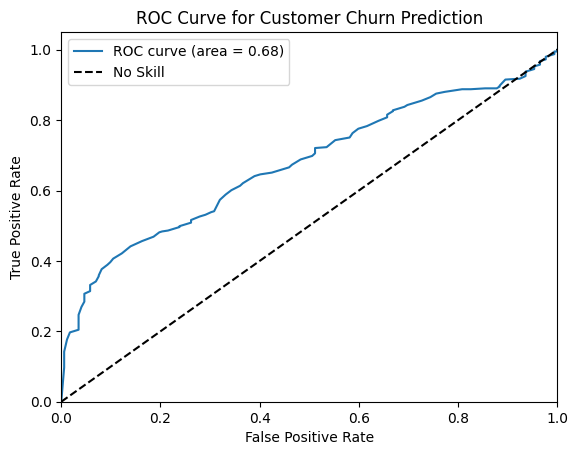

In [87]:
y_pred_proba = stacking_model.predict_proba(X_test)[:,1]
# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba) 
roc_auc = auc(fpr, tpr)
# Plot the ROC curve
plt.figure()  
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], 'k--', label='No Skill')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Customer Churn Prediction')
plt.legend()
plt.show()

# [Question 5] Convolutional Neural Network. [25 points]

In [1]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
from torch.utils.data import DataLoader, SubsetRandomSampler
import numpy as np

In [2]:
# Transformations for data augmentation and normalization
transform = transforms.Compose([transforms.ToTensor(), transforms.Normalize((0.5, 0.5,
0.5), (0.5, 0.5, 0.5))])

In [3]:
from torch.utils.data.sampler import SubsetRandomSampler

# Load CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True,
transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True,
transform=transform)

# Create data loaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False)

Files already downloaded and verified
Files already downloaded and verified


In [4]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog',
'horse', 'ship', 'truck']

## Task 1

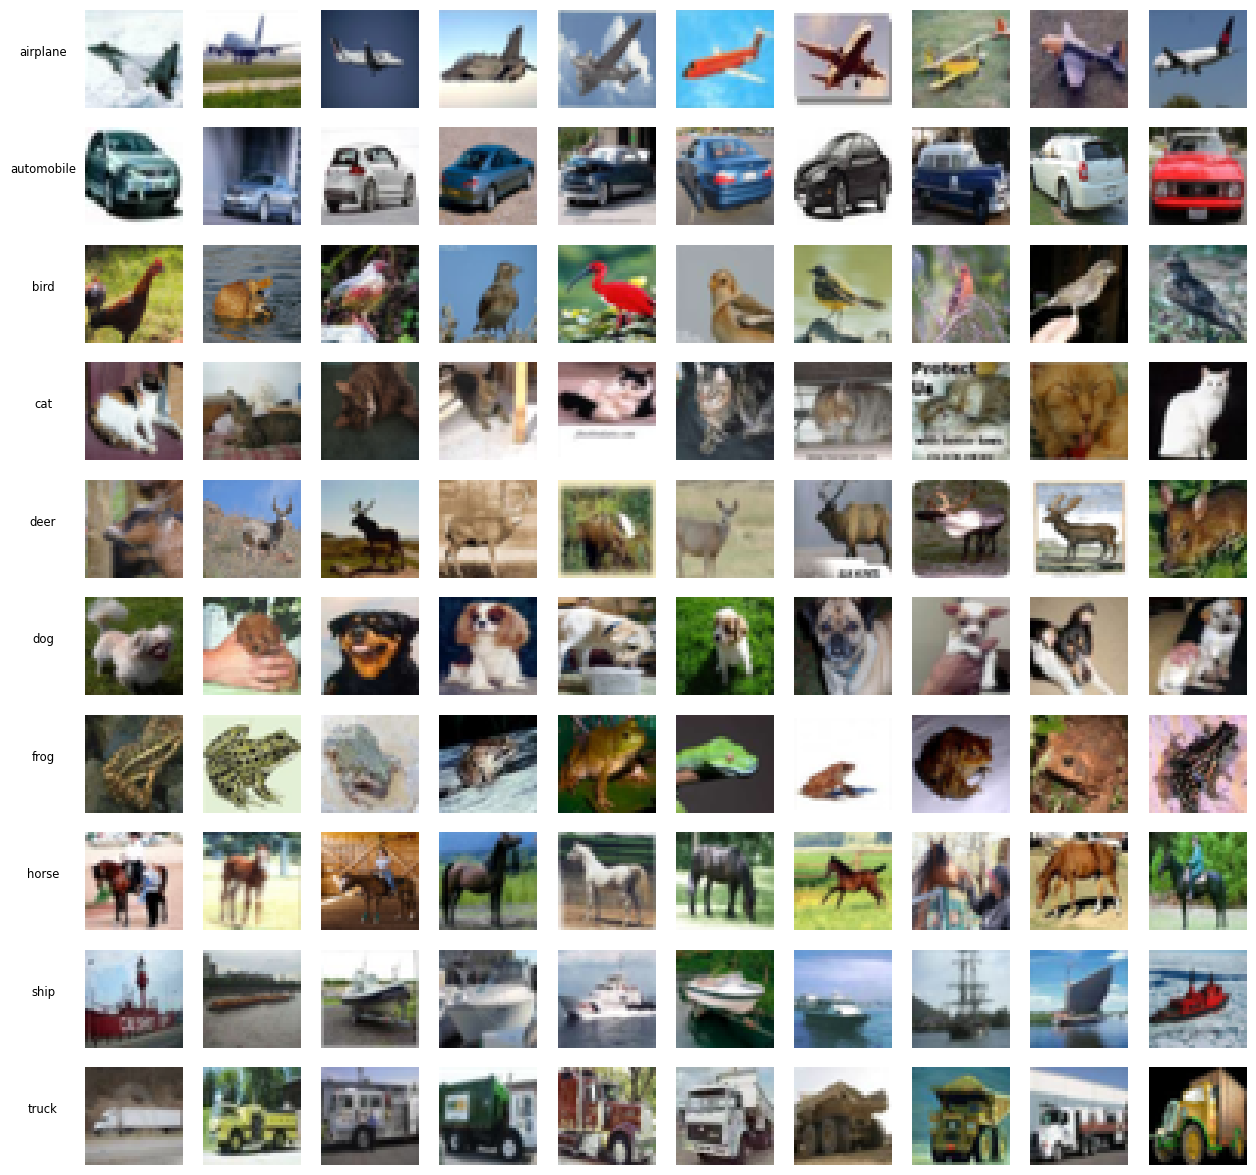

In [10]:
import matplotlib.pyplot as plt
import random

# Function to show an image
def imshow(img):
    img = img / 2 + 0.5  # Unnormalize
    npimg = img.numpy() # Convert from tensor
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

# Create a dictionary to hold the images for each class
images_dict = {cname: [] for cname in class_names}

# Iterate over the dataset and add images to the appropriate class list
for image, label in trainset:
    cname = class_names[label]
    images_dict[cname].append(image)

# Now sample 10 images from each class with replacement
sampled_images_dict = {cname: random.choices(images, k=10) for cname, images in images_dict.items()}

# Plot the images
fig, axs = plt.subplots(10, 10, figsize=(15, 15))

for i, cname in enumerate(class_names):
    for j, image in enumerate(sampled_images_dict[cname]):
        axs[i, j].imshow(np.transpose(image.numpy() / 2 + 0.5, (1, 2, 0)))
        axs[i, j].axis('off')
    axs[i, 0].axis('on')
    axs[i, 0].tick_params(left = False, right = False , labelleft = False ,
                          labelbottom = False, bottom = False)
    # Turn off the box
    # for spine in axs[i, 0].spines.values():
    #     spine.set_visible(False)
    axs[i, 0].set_ylabel(cname, rotation=0, size='small', labelpad=30)

plt.show()

In [5]:
import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, Activation

# Define a simple Keras model
model = Sequential([
  Flatten(input_shape=(32, 32, 3)),
  Dense(10, activation='softmax')    
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# # Custom generator function
def pytorch_dataloader_to_keras_generator(dataloader):
    while True:
        for batch in dataloader:
            images, labels = batch
            yield images.permute(0, 2, 3, 1).cpu().numpy(), np.eye(10)[labels.cpu().numpy()]

# Create the generator
train_generator = pytorch_dataloader_to_keras_generator(trainloader)
test_generator = pytorch_dataloader_to_keras_generator(testloader)
steps_per_epoch = len(trainloader)

# Fit the model using the generator
steps_per_epoch = len(trainloader)
lin_fit = model.fit(train_generator, epochs=20, steps_per_epoch=steps_per_epoch, validation_data=test_generator, validation_steps=len(testloader))

c:\Users\liu_y\anaconda3\envs\CS610-env\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 64s 5ms/step - accuracy: 0.2958 - loss: 2.3491 - val_accuracy: 0.3095 - val_loss: 2.3584
Epoch 2/20
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 50s 4ms/step - accuracy: 0.3312 - loss: 2.2688 - val_accuracy: 0.3250 - val_loss: 2.3083
Epoch 3/20
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 51s 4ms/step - accuracy: 0.3410 - loss: 2.2384 - val_accuracy: 0.3219 - val_loss: 2.2253
Epoch 4/20
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 60s 5ms/step - accuracy: 0.3489 - loss: 2.2239 - val_accuracy: 0.2935 - val_loss: 2.4337
Epoch 5/20
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 46s 4ms/step - accuracy: 0.3478 - loss: 2.2102 - val_accuracy: 0.3501 - val_loss: 2.2783
Epoch 6/20
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 49s 4ms/step - accuracy: 0.3549 - loss: 2.2106 - val_accuracy: 0.3102 - val_loss: 2.4028
Epoch 7/20
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 55s 4ms/step - accuracy: 0.3505 - loss: 2.2111 - val_accuracy: 0.2916 - val_loss: 2.5861
Epoch 8/20
12500/12500 ━━━━━━━━━━━━━━━━━━━━ 54s 4ms/step - accuracy: 

In [92]:
from sklearn import metrics
import seaborn as sns

2500/2500 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step


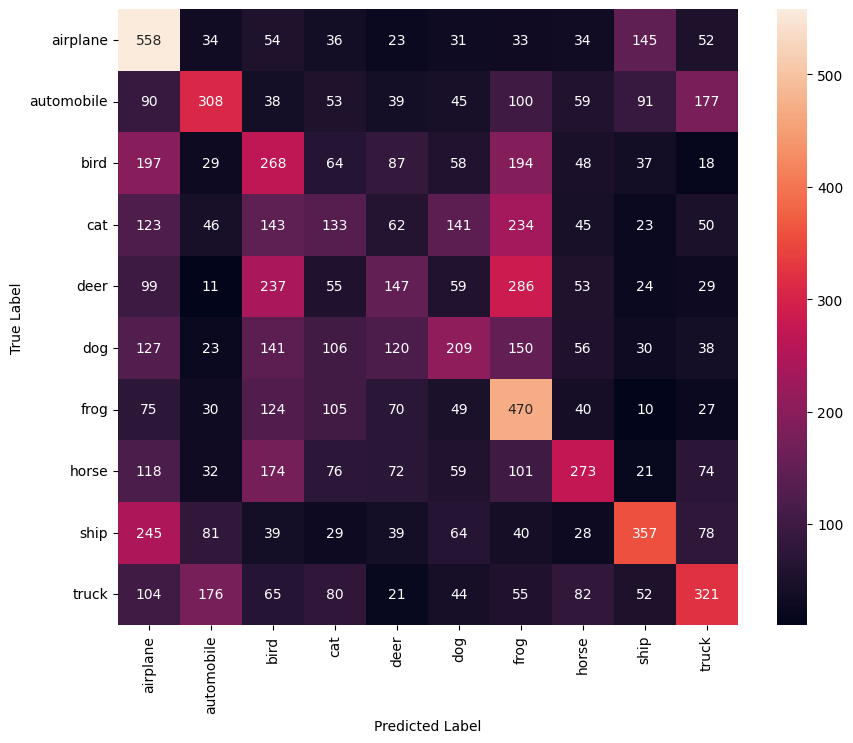

In [60]:
test_generator = pytorch_dataloader_to_keras_generator(testloader)
steps = len(testloader)
lin_predict = model.predict(test_generator, steps=steps)
lin_predict = np.argmax(lin_predict, axis=1)

true_labels = []
for _, labels in testloader:
    true_labels.extend(labels.numpy())

true_labels = np.array(true_labels)

#Visualizing model performance and classification report
cm_lin = metrics.confusion_matrix(true_labels,lin_predict)
fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(cm_lin, annot=True, fmt='g', xticklabels=class_names, yticklabels=class_names)
ax.set(ylabel="True Label", xlabel="Predicted Label")
plt.show()

              precision    recall  f1-score   support



    airplane       0.32      0.56      0.41      1000

  automobile       0.40      0.31      0.35      1000

        bird       0.21      0.27      0.23      1000

         cat       0.18      0.13      0.15      1000

        deer       0.22      0.15      0.17      1000

         dog       0.28      0.21      0.24      1000

        frog       0.28      0.47      0.35      1000

       horse       0.38      0.27      0.32      1000

        ship       0.45      0.36      0.40      1000

       truck       0.37      0.32      0.34      1000



    accuracy                           0.30     10000

   macro avg       0.31      0.30      0.30     10000

weighted avg       0.31      0.30      0.30     10000




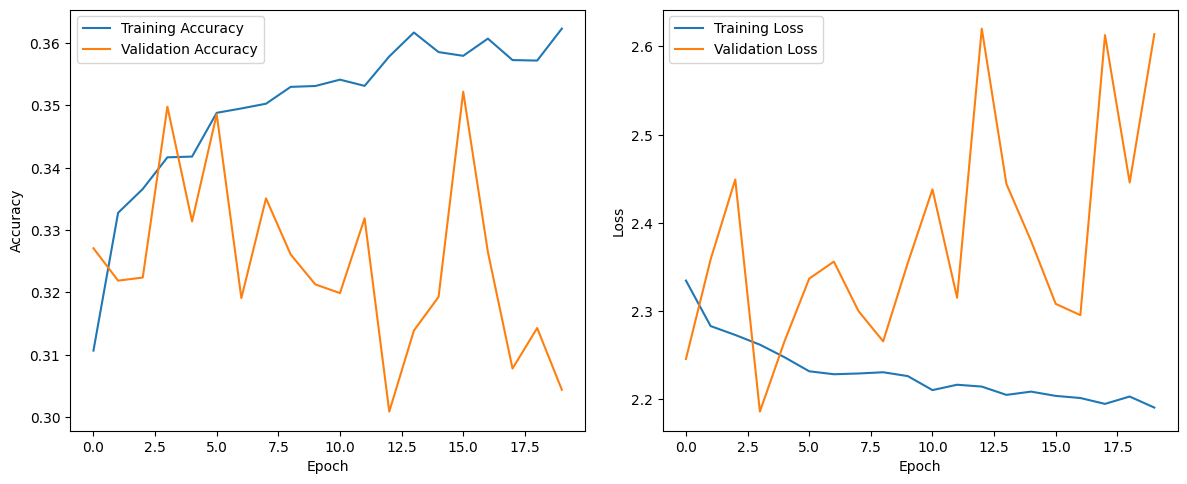

In [61]:
print(metrics.classification_report(true_labels, lin_predict, target_names=class_names))

fig = plt.figure(figsize=(12, 5))
axes1 = fig.add_subplot(1, 2, 1)
axes2 = fig.add_subplot(1, 2, 2)
axes1.set(xlabel='Epoch', ylabel='Accuracy')
axes2.set(xlabel='Epoch', ylabel='Loss')
fig.tight_layout()

axes1.plot(lin_fit.history['accuracy'], label='Training Accuracy')
axes1.plot(lin_fit.history['val_accuracy'], label='Validation Accuracy')
axes1.legend()

# Plotting loss
axes2.plot(lin_fit.history['loss'], label='Training Loss')
axes2.plot(lin_fit.history['val_loss'], label='Validation Loss')
axes2.legend()

plt.show()

##### From the confusion matrix, it is observed that ship images are most confused with airplanes. The architecture of the network is linear, thus, the model was not able to learn anything useful.

###  Task 3

In [22]:
import torch
import torch.nn as nn
import torch.nn.functional as F

# Check if GPU is available
train_on_gpu = torch.cuda.is_available()

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()

        # First convolutional layer with 512 filters
        self.conv1 = nn.Conv2d(3, 512, 3, padding='same')  # input channels = 3 (RGB)
        self.bn1 = nn.BatchNorm2d(512)
        self.pool = nn.MaxPool2d(2, 2)  # Pool to reduce size
        self.dropout1 = nn.Dropout(0.25)

        # Second convolutional layer with 256 filters
        self.conv2 = nn.Conv2d(512, 256, 3, padding='same')
        self.bn2 = nn.BatchNorm2d(256)
#         self.pool2 = nn.MaxPool2d(2, 2)
        self.dropout2 = nn.Dropout(0.25)

        # Third convolutional layer with 512 filters
        self.conv3 = nn.Conv2d(256, 512, 3, padding='same')
        self.bn3 = nn.BatchNorm2d(512)
#         self.pool3 = nn.MaxPool2d(2, 2)
        self.dropout3 = nn.Dropout(0.25)

        # Fully connected layers
        # Adjusting the fully connected layer to match the expected size after pooling
        # Asfter 3 pooling layers the size should be 4x4
        self.fc1 = nn.Linear(512 * 4 * 4, 120)  # 512 channels, and 4x4 is the spatial size after pooling
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)  # 10 classes for output

    def forward(self, x):
        x = self.pool(F.relu(self.bn1(self.conv1(x))))  # Apply convolution, then batch norm, ReLU, and pooling
        x = self.pool(F.relu(self.bn2(self.conv2(x))))  # Repeat for second layer
        x = self.pool(F.relu(self.bn3(self.conv3(x))))  # Repeat for third layer

        # Flatten 
        x = x.view(-1, 512 * 4 * 4)  
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)  
        return x

# Create the CNN
model = Net()
print(model)

# Move tensors to GPU if CUDA is available
if train_on_gpu:
    model.cuda()

Net(
  (conv1): Conv2d(3, 512, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (bn1): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout1): Dropout(p=0.25, inplace=False)
  (conv2): Conv2d(512, 256, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (bn2): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout2): Dropout(p=0.25, inplace=False)
  (conv3): Conv2d(256, 512, kernel_size=(3, 3), stride=(1, 1), padding=same)
  (bn3): BatchNorm2d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (dropout3): Dropout(p=0.25, inplace=False)
  (fc1): Linear(in_features=8192, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)


In [23]:
import matplotlib.pyplot as plt
import torch
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# Lists to hold accuracy and loss data
train_accuracies = []
val_accuracies = []
train_losses = []
val_losses = []

num_epochs = 20  # Number of epochs

for epoch in range(num_epochs):
    # Training phase
    model.train()  # Set the model to training mode
    train_loss = 0
    correct = 0
    total = 0
    for data, targets in trainloader:
        if train_on_gpu:
            data, targets = data.cuda(), targets.cuda()

        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()

    train_accuracy = 100 * correct / total
    train_accuracies.append(train_accuracy)
    train_losses.append(train_loss / len(trainloader))

    # Validation phase
    model.eval()  # Set the model to evaluation mode
    val_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for data, targets in testloader:
            if train_on_gpu:
                data, targets = data.cuda(), targets.cuda()

            outputs = model(data)
            loss = criterion(outputs, targets)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()

    val_accuracy = 100 * correct / total
    val_accuracies.append(val_accuracy)
    val_losses.append(val_loss / len(testloader))

    print(f'Epoch {epoch+1}: Train Acc: {train_accuracy:.2f}%, Val Acc: {val_accuracy:.2f}%, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}')

Epoch 1: Train Acc: 58.60%, Val Acc: 70.08%, Train Loss: 1.1657, Val Loss: 0.8688
Epoch 2: Train Acc: 72.14%, Val Acc: 74.85%, Train Loss: 0.7974, Val Loss: 0.7290
Epoch 3: Train Acc: 77.16%, Val Acc: 75.43%, Train Loss: 0.6533, Val Loss: 0.7099
Epoch 4: Train Acc: 80.80%, Val Acc: 77.66%, Train Loss: 0.5518, Val Loss: 0.6437
Epoch 5: Train Acc: 83.78%, Val Acc: 78.95%, Train Loss: 0.4660, Val Loss: 0.6253
Epoch 6: Train Acc: 86.56%, Val Acc: 79.15%, Train Loss: 0.3815, Val Loss: 0.6209
Epoch 7: Train Acc: 88.89%, Val Acc: 78.83%, Train Loss: 0.3167, Val Loss: 0.6466
Epoch 8: Train Acc: 90.97%, Val Acc: 79.79%, Train Loss: 0.2574, Val Loss: 0.6728
Epoch 9: Train Acc: 92.71%, Val Acc: 81.00%, Train Loss: 0.2053, Val Loss: 0.6758
Epoch 10: Train Acc: 93.99%, Val Acc: 81.38%, Train Loss: 0.1689, Val Loss: 0.6953
Epoch 11: Train Acc: 95.06%, Val Acc: 80.85%, Train Loss: 0.1398, Val Loss: 0.7278
Epoch 12: Train Acc: 95.75%, Val Acc: 81.12%, Train Loss: 0.1203, Val Loss: 0.7962
Epoch 13: Tra

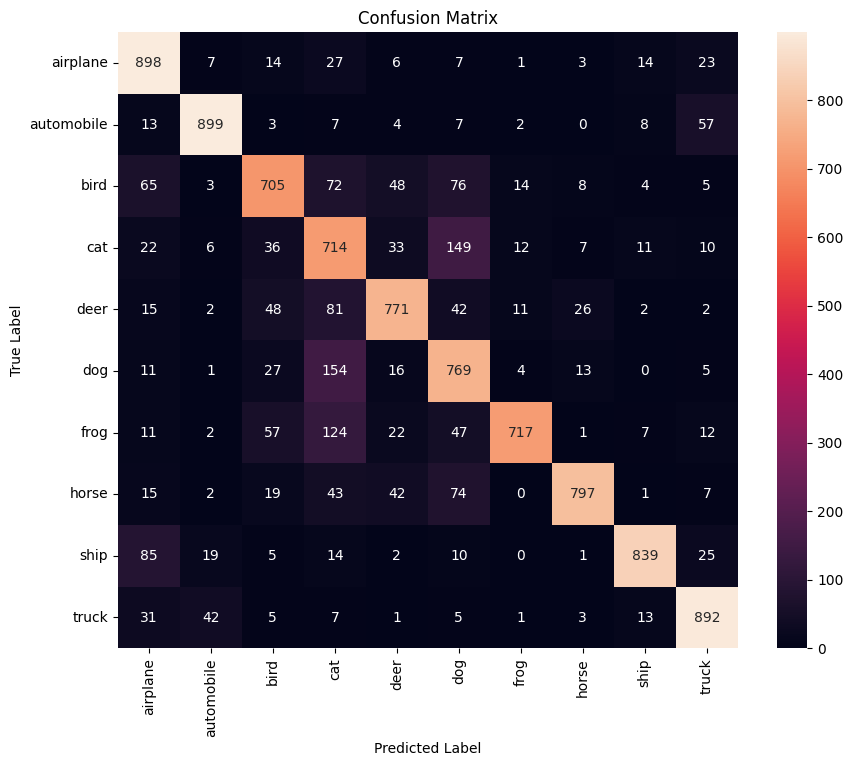

              precision    recall  f1-score   support

    airplane       0.77      0.90      0.83      1000
  automobile       0.91      0.90      0.91      1000
        bird       0.77      0.70      0.73      1000
         cat       0.57      0.71      0.64      1000
        deer       0.82      0.77      0.79      1000
         dog       0.65      0.77      0.70      1000
        frog       0.94      0.72      0.81      1000
       horse       0.93      0.80      0.86      1000
        ship       0.93      0.84      0.88      1000
       truck       0.86      0.89      0.88      1000

    accuracy                           0.80     10000
   macro avg       0.82      0.80      0.80     10000
weighted avg       0.82      0.80      0.80     10000



In [24]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns

# Predictions and labels arrays
y_pred = []
y_true = []

# Gather all predictions and labels
with torch.no_grad():
    for data in testloader:
        images, labels = data
        if train_on_gpu:
            images = images.cuda()
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

cm = confusion_matrix(y_true, y_pred)

# Normalize the confusion matrix by row (i.e., by the number of samples in each class)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="g", cbar=True, xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print(classification_report(y_true, y_pred, target_names=class_names))

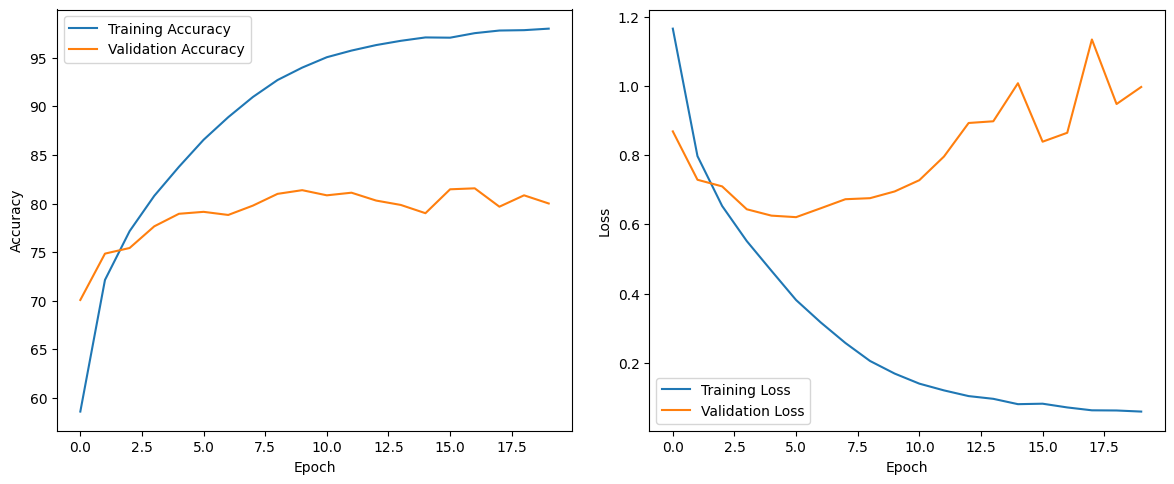

In [25]:
fig = plt.figure(figsize=(12, 5))
axes1 = fig.add_subplot(1, 2, 1)
axes2 = fig.add_subplot(1, 2, 2)
axes1.set(xlabel='Epoch', ylabel='Accuracy')
axes2.set(xlabel='Epoch', ylabel='Loss')
fig.tight_layout()

axes1.plot(train_accuracies, label='Training Accuracy')
axes1.plot(val_accuracies, label='Validation Accuracy')
axes1.legend()

# Plotting loss
axes2.plot(train_losses, label='Training Loss')
axes2.plot(val_losses, label='Validation Loss')
axes2.legend()

plt.show()

From the result, we observe that this deeper model constructed produced better results in the classification. However, from the training and validation curve, we observe that the data is not generalising well and do not seem to be a good fit. 

### Task 4

Design a convolutional neural network to achieve 80%+ macro accuracy on the test set. Compare
the accuracy and the number of trainable parameters between the CNN model and the FNN model
built in the previous task. (10 points)

In [5]:
import torch
import torch.nn as nn
import torch.nn.functional as F

In [22]:
# Perform data augmentation
# Transformations for data augmentation and normalization
transform = transforms.Compose([
    transforms.RandomHorizontalFlip(p=0.5),
    # Randomly rotate some images by 20 degrees
    transforms.RandomRotation(20),
    # Randomly crop images
    transforms.RandomCrop(32,padding=4),
    # Randomly adjust brightness, contrast, saturation, and hue
    transforms.RandomAdjustSharpness(sharpness_factor = 2,p = 0.2),
    transforms.ToTensor(), 
    transforms.Normalize((0.5, 0.5,0.5), (0.5, 0.5, 0.5)),
])

# Load CIFAR-10 dataset
trainset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True,
transform=transform)
testset = torchvision.datasets.CIFAR10(root='./data', train=False, download=True,
transform=transform)

# Create data loaders
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=4, shuffle=False)


Files already downloaded and verified
Files already downloaded and verified


In [23]:
class ResNet(nn.Module):
    def conv_block(self, input_channels, output_channels, use_pool=False):
        layers = [nn.Conv2d(input_channels, output_channels, kernel_size=3, padding=1),
                  nn.BatchNorm2d(output_channels),
                  nn.ReLU(inplace=True)]
        if use_pool: layers.append(nn.MaxPool2d(2))
        return nn.Sequential(*layers)

    def __init__(self, input_channels, number_classes):
        super().__init__()

        self.conv1 = self.conv_block(input_channels, 64)
        self.conv2 = self.conv_block(64, 128, use_pool=True)
        
        self.residual1 = nn.Sequential(self.conv_block(128, 128), self.conv_block(128, 128))

        self.conv3 = self.conv_block(128, 256, use_pool=True)
        self.conv4 = self.conv_block(256, 512, use_pool=True)
        self.residual2 = nn.Sequential(self.conv_block(512, 512), self.conv_block(512, 512))

        self.classifier = nn.Sequential(nn.MaxPool2d(4),
                                        nn.Flatten(),
                                        nn.Linear(512, number_classes))

    def forward(self, xb):
        layer1 = self.conv1(xb)
        layer2 = self.conv2(layer1)
        residual1 = self.residual1(layer2) + layer2
        layer3 = self.conv3(residual1)
        layer4 = self.conv4(layer3)
        residual2 = self.residual2(layer4) + layer4
        class_output = self.classifier(residual2)
        return class_output

In [24]:
import torch.optim as optim
from torch.backends import cudnn
# model = Net()
device = "cuda" if torch.cuda.is_available() else "cpu"
train_on_gpu = torch.cuda.is_available()
model = ResNet(3,10).to(device)
if train_on_gpu:
  model.cuda()
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001, weight_decay = 20e-5)
scheduler = torch.optim.lr_scheduler.ReduceLROnPlateau(optimizer=optimizer,mode='min',verbose=True,factor=0.3,patience=3,threshold=0.09)

In [26]:
# Lists to hold accuracy and loss data
train_accuracies = []
val_accuracies = []
train_losses = []
val_losses = []

num_epochs = 30  # Number of epochs

for epoch in range(num_epochs):
    # Training phase
    model.train()  # Set the model to training mode
    train_loss = 0
    correct = 0
    total = 0
    for data, targets in trainloader:
        if train_on_gpu:
            data, targets = data.cuda(), targets.cuda()

        optimizer.zero_grad()
        outputs = model(data)
        loss = criterion(outputs, targets)
        loss.backward()
        optimizer.step()

        train_loss += loss.item()
        _, predicted = torch.max(outputs.data, 1)
        total += targets.size(0)
        correct += (predicted == targets).sum().item()
    
    train_accuracy = 100 * correct / total
    train_accuracies.append(train_accuracy)
    train_losses.append(train_loss / len(trainloader))
    if scheduler is not None:
        scheduler.step(train_loss)

    # Validation phase
    model.eval()  # Set the model to evaluation mode
    val_loss = 0
    correct = 0
    total = 0
    with torch.no_grad():
        for data, targets in testloader:
            if train_on_gpu:
                data, targets = data.cuda(), targets.cuda()

            outputs = model(data)
            loss = criterion(outputs, targets)
            val_loss += loss.item()
            _, predicted = torch.max(outputs.data, 1)
            total += targets.size(0)
            correct += (predicted == targets).sum().item()

    val_accuracy = 100 * correct / total
    val_accuracies.append(val_accuracy)
    val_losses.append(val_loss / len(testloader))

    print(f'Epoch {epoch+1}: Train Acc: {train_accuracy:.2f}%, Val Acc: {val_accuracy:.2f}%, Train Loss: {train_losses[-1]:.4f}, Val Loss: {val_losses[-1]:.4f}')

Epoch 1: Train Acc: 52.97%, Val Acc: 67.85%, Train Loss: 1.3286, Val Loss: 0.9177
Epoch 2: Train Acc: 68.16%, Val Acc: 71.09%, Train Loss: 0.9163, Val Loss: 0.8312
Epoch 3: Train Acc: 73.21%, Val Acc: 74.64%, Train Loss: 0.7734, Val Loss: 0.7218
Epoch 4: Train Acc: 76.18%, Val Acc: 76.54%, Train Loss: 0.6881, Val Loss: 0.6897
Epoch 5: Train Acc: 78.27%, Val Acc: 78.47%, Train Loss: 0.6343, Val Loss: 0.6241
Epoch 6: Train Acc: 79.59%, Val Acc: 76.88%, Train Loss: 0.5942, Val Loss: 0.6824
Epoch 7: Train Acc: 80.77%, Val Acc: 81.17%, Train Loss: 0.5588, Val Loss: 0.5497
Epoch 8: Train Acc: 81.73%, Val Acc: 80.96%, Train Loss: 0.5264, Val Loss: 0.5555
Epoch 9: Train Acc: 82.47%, Val Acc: 83.14%, Train Loss: 0.5064, Val Loss: 0.4933
Epoch 10: Train Acc: 83.25%, Val Acc: 82.02%, Train Loss: 0.4813, Val Loss: 0.5110
Epoch 11: Train Acc: 84.21%, Val Acc: 81.75%, Train Loss: 0.4620, Val Loss: 0.5347
Epoch 12: Train Acc: 84.92%, Val Acc: 82.66%, Train Loss: 0.4432, Val Loss: 0.5112
Epoch 13: Tra

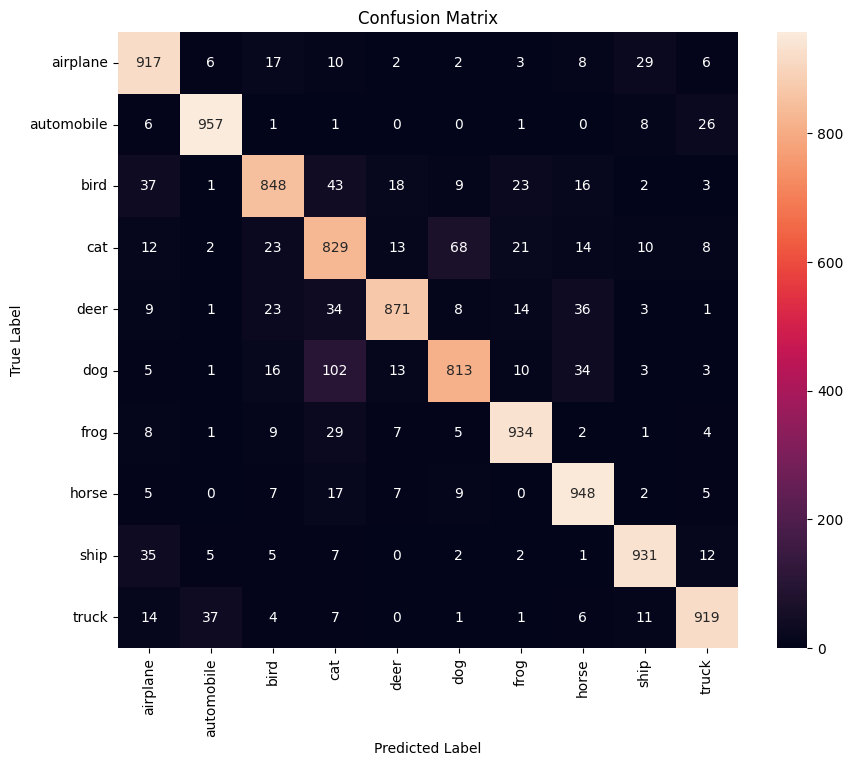

              precision    recall  f1-score   support

    airplane       0.88      0.92      0.90      1000
  automobile       0.95      0.96      0.95      1000
        bird       0.89      0.85      0.87      1000
         cat       0.77      0.83      0.80      1000
        deer       0.94      0.87      0.90      1000
         dog       0.89      0.81      0.85      1000
        frog       0.93      0.93      0.93      1000
       horse       0.89      0.95      0.92      1000
        ship       0.93      0.93      0.93      1000
       truck       0.93      0.92      0.93      1000

    accuracy                           0.90     10000
   macro avg       0.90      0.90      0.90     10000
weighted avg       0.90      0.90      0.90     10000



In [27]:
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns

# Predictions and labels arrays
y_pred = []
y_true = []

# Gather all predictions and labels
with torch.no_grad():
    for data in testloader:
        images, labels = data
        if train_on_gpu:
            images = images.cuda()
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        y_pred.extend(predicted.cpu().numpy())
        y_true.extend(labels.cpu().numpy())

cm = confusion_matrix(y_true, y_pred)

# Normalize the confusion matrix by row (i.e., by the number of samples in each class)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="g", cbar=True, xticklabels=class_names, yticklabels=class_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.show()

print(classification_report(y_true, y_pred, target_names=class_names))

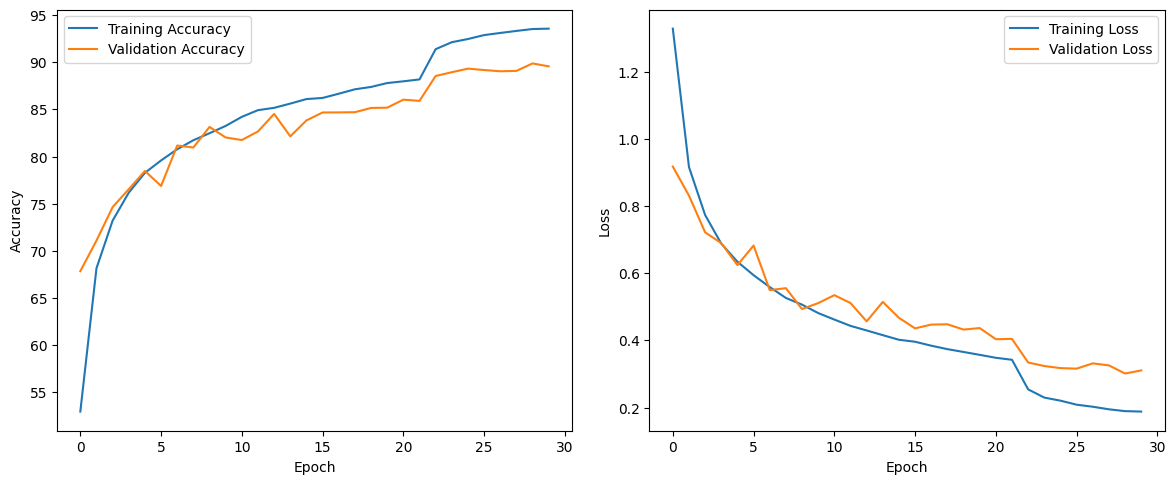

In [28]:
fig = plt.figure(figsize=(12, 5))
axes1 = fig.add_subplot(1, 2, 1)
axes2 = fig.add_subplot(1, 2, 2)
axes1.set(xlabel='Epoch', ylabel='Accuracy')
axes2.set(xlabel='Epoch', ylabel='Loss')
fig.tight_layout()

axes1.plot(train_accuracies, label='Training Accuracy')
axes1.plot(val_accuracies, label='Validation Accuracy')
axes1.legend()

# Plotting loss
axes2.plot(train_losses, label='Training Loss')
axes2.plot(val_losses, label='Validation Loss')
axes2.legend()

plt.show()

Compared to the feedforward neural network (FNN), the CNN model is able to classify better, with more than 2 times the macro accuracy. 

In terms of trainable parameters, the FNN model has 30,730 trainable parameters and the CNN model has 6,575,370 trainable parameters. As such, this makes the CNN model much more complex as compared to the FNN model. Thus, the CNN model is able to generalise better as it is adjusted to more intricate patterns. 

With this model, we observe that that it is appears to fit better than the FNN model. In the FNN model, the macro accuracy for most objects performed relatively well compared to cats and dogs. 


# [Question 6]

In [197]:
import keras
import pandas as pd
import numpy as np
import tensorflow as tf
from imblearn.over_sampling import SMOTE
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, Flatten, Dropout, Activation, BatchNormalization
from sklearn.model_selection import train_test_split
from tensorflow.keras.optimizers import Adam

In [198]:
train=pd.read_csv('Kaggle/train.csv')
test=pd.read_csv('Kaggle/test.csv')

In [9]:
train.head()

,r0c0,r0c1,r0c2,r0c3,r0c4,r0c5,r0c6,r0c7,r0c8,r0c9,r0c10,r0c11,r0c12,r0c13,r0c14,r0c15,r0c16,r0c17,r0c18,r0c19,r1c0,r1c1,r1c2,r1c3,r1c4,r1c5,r1c6,r1c7,r1c8,r1c9,r1c10,r1c11,r1c12,r1c13,r1c14,r1c15,r1c16,r1c17,r1c18,r1c19,r2c0,r2c1,r2c2,r2c3,r2c4,r2c5,r2c6,r2c7,r2c8,r2c9,r2c10,r2c11,r2c12,r2c13,r2c14,r2c15,r2c16,r2c17,r2c18,r2c19,r3c0,r3c1,r3c2,r3c3,r3c4,r3c5,r3c6,r3c7,r3c8,r3c9,r3c10,r3c11,r3c12,r3c13,r3c14,r3c15,r3c16,r3c17,r3c18,r3c19,r4c0,r4c1,r4c2,r4c3,r4c4,r4c5,r4c6,r4c7,r4c8,r4c9,r4c10,r4c11,r4c12,r4c13,r4c14,r4c15,r4c16,r4c17,r4c18,r4c19,r5c0,r5c1,r5c2,r5c3,r5c4,r5c5,r5c6,r5c7,r5c8,r5c9,r5c10,r5c11,r5c12,r5c13,r5c14,r5c15,r5c16,r5c17,r5c18,r5c19,r6c0,r6c1,r6c2,r6c3,r6c4,r6c5,r6c6,r6c7,r6c8,r6c9,r6c10,r6c11,r6c12,r6c13,r6c14,r6c15,r6c16,r6c17,r6c18,r6c19,r7c0,r7c1,r7c2,r7c3,r7c4,r7c5,r7c6,r7c7,r7c8,r7c9,r7c10,r7c11,r7c12,r7c13,r7c14,r7c15,r7c16,r7c17,r7c18,r7c19,r8c0,r8c1,r8c2,r8c3,r8c4,r8c5,r8c6,r8c7,r8c8,r8c9,r8c10,r8c11,r8c12,r8c13,r8c14,r8c15,r8c16,r8c17,r8c18,r8c19,r9c0,r9c1,r9c2,r9c3,r9c4,r9c5,r9c6,r9c7,r9c8,r9c9,r9c10,r9c11,r9c12,r9c13,r9c14,r9c15,r9c16,r9c17,r9c18,r9c19,r10c0,r10c1,r10c2,r10c3,r10c4,r10c5,r10c6,r10c7,r10c8,r10c9,r10c10,r10c11,r10c12,r10c13,r10c14,r10c15,r10c16,r10c17,r10c18,r10c19,r11c0,r11c1,r11c2,r11c3,r11c4,r11c5,r11c6,r11c7,r11c8,r11c9,r11c10,r11c11,r11c12,r11c13,r11c14,r11c15,r11c16,r11c17,r11c18,r11c19,r12c0,r12c1,r12c2,r12c3,r12c4,r12c5,r12c6,r12c7,r12c8,r12c9,r12c10,r12c11,r12c12,r12c13,r12c14,r12c15,r12c16,r12c17,r12c18,r12c19,r13c0,r13c1,r13c2,r13c3,r13c4,r13c5,r13c6,r13c7,r13c8,r13c9,r13c10,r13c11,r13c12,r13c13,r13c14,r13c15,r13c16,r13c17,r13c18,r13c19,r14c0,r14c1,r14c2,r14c3,r14c4,r14c5,r14c6,r14c7,r14c8,r14c9,r14c10,r14c11,r14c12,r14c13,r14c14,r14c15,r14c16,r14c17,r14c18,r14c19,r15c0,r15c1,r15c2,r15c3,r15c4,r15c5,r15c6,r15c7,r15c8,r15c9,r15c10,r15c11,r15c12,r15c13,r15c14,r15c15,r15c16,r15c17,r15c18,r15c19,r16c0,r16c1,r16c2,r16c3,r16c4,r16c5,r16c6,r16c7,r16c8,r16c9,r16c10,r16c11,r16c12,r16c13,r16c14,r16c15,r16c16,r16c17,r16c18,r16c19,r17c0,r17c1,r17c2,r17c3,r17c4,r17c5,r17c6,r17c7,r17c8,r17c9,r17c10,r17c11,r17c12,r17c13,r17c14,r17c15,r17c16,r17c17,r17c18,r17c19,r18c0,r18c1,r18c2,r18c3,r18c4,r18c5,r18c6,r18c7,r18c8,r18c9,r18c10,r18c11,r18c12,r18c13,r18c14,r18c15,r18c16,r18c17,r18c18,r18c19,r19c0,r19c1,r19c2,r19c3,r19c4,r19c5,r19c6,r19c7,r19c8,r19c9,r19c10,r19c11,r19c12,r19c13,r19c14,r19c15,r19c16,r19c17,r19c18,r19c19,label
0,1,1,1,1,28,43,52,255,255,255,255,255,80,39,1,1,1,1,1,1,1,1,1,45,196,255,255,255,255,255,255,255,255,241,86,56,1,1,1,1,1,1,50,195,255,255,250,150,217,183,255,255,255,255,255,211,67,1,1,1,1,45,204,255,255,255,244,15,60,37,86,86,226,255,255,255,215,67,1,1,28,224,255,255,255,255,60,1,1,1,1,1,36,246,255,255,255,100,1,1,34,255,255,255,255,56,1,1,1,1,1,1,1,23,255,255,255,255,67,1,108,255,255,255,255,56,1,1,1,1,1,1,1,15,189,255,255,255,130,12,255,255,255,255,172,28,1,1,1,1,1,1,1,1,56,255,255,255,255,34,108,255,255,255,89,1,1,1,1,1,1,1,1,1,56,255,255,255,255,34,34,255,255,255,89,1,1,1,1,1,1,1,1,1,56,255,255,255,255,34,71,255,255,255,255,56,1,1,1,1,1,1,1,1,1,89,255,255,255,219,182,255,255,255,255,122,8,1,1,1,1,1,1,1,1,89,255,255,255,108,34,255,255,255,255,255,23,1,1,1,1,1,1,1,1,89,255,255,255,145,12,130,255,255,255,255,23,1,1,1,1,1,1,1,37,200,255,255,255,34,1,67,255,255,255,255,207,1,1,1,1,1,1,1,56,255,255,255,255,34,1,1,1,134,255,255,255,219,30,1,1,1,36,61,255,255,255,230,56,1,1,1,1,89,226,255,255,255,204,86,86,86,226,255,255,255,255,100,1,1,1,1,1,1,84,228,255,255,255,255,255,255,255,255,255,255,255,100,1,1,1,1,1,1,1,67,93,255,255,255,255,255,255,255,219,86,86,34,1,1,1,1,1,1,1,1,2,80,191,43,43,191,255,52,34,1,1,1,1,1,0
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1

In [3]:
train['label'].value_counts()
ratio = train['label'].value_counts(normalize=True)
ratio

label
0    0.909092
1    0.090908
Name: proportion, dtype: float64

In [89]:
train.isna().sum()
test.isna().sum()

Id        0
r0c0      0
r0c1      0
r0c2      0
r0c3      0
         ..
r19c15    0
r19c16    0
r19c17    0
r19c18    0
r19c19    0
Length: 401, dtype: int64

In [4]:
x = train.iloc[:,:400]
y = train.iloc[:,400]
y

0        0
1        0
2        0
3        1
4        0
        ..
72134    0
72135    0
72136    0
72137    0
72138    0
Name: label, Length: 72139, dtype: int64

In [199]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2024)

In [200]:
smote = SMOTE(random_state=42)
X_train_res, y_train_res = smote.fit_resample(X_train, y_train)

From the data shape, we observe 20 sets of values, with each set consisting of 20 row values with 20 column values. Assuming that this represents the shape of the image, we reshape the data into a 20x20 array.

In [201]:
X_train = np.asarray(X_train_res).reshape(104926,20,20,1)
X_test = np.asarray(X_test).reshape(14428,20,20,1)
y_train = np.asarray(y_train_res)
y_test = np.asarray(y_test)

In [11]:
pd.Series(y_train).value_counts().sort_index()

0    52463
1    52463
Name: count, dtype: int64

In [202]:
# Normalise the data to RGB by dividing by 255.0
X_train = X_train / 255.0
X_test = X_test / 255.0

In [9]:
import matplotlib.pyplot as plt

In [103]:
test.shape

(30917, 401)

In [203]:
predictInput = np.asarray(test.iloc[:,1:]).reshape(30917,20,20,1) / 255.0
predictId = test['Id']

In [223]:
cnn_model = Sequential()

cnn_model.add(Conv2D(64,kernel_size=(3,3), input_shape=(20,20,1), padding='valid'))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPool2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(128,kernel_size=(3,3), padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPool2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.3))

cnn_model.add(Conv2D(256,kernel_size=(3,3), padding='same'))
cnn_model.add(BatchNormalization())
cnn_model.add(Activation('relu'))
cnn_model.add(MaxPool2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.3))

cnn_model.add(Flatten())
cnn_model.add(Dense(128, activation = 'relu'))
cnn_model.add(Dense(1, activation = 'sigmoid'))
cnn_model.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

cnn_model.save('saved_models/cnn_model.keras')

In [215]:
cnn_model.summary()

Model: "sequential_40"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_161 (Conv2D)             │ (None, 18, 18, 64)     │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_97          │ (None, 18, 18, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_16 (Activation)      │ (None, 18, 18, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_111               │ (None, 9, 9, 64)       │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_107 (Dropout)           │ (None, 9, 9, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_162 (Conv2D)             │ (None, 9, 9, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_98          │ (None, 9, 9, 128)      │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_17 (Activation)      │ (None, 9, 9, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_112               │ (None, 4, 4, 128)      │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_108 (Dropout)           │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_163 (Conv2D)             │ (None, 4, 4, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_99          │ (None, 4, 4, 256)      │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_18 (Activation)      │ (None, 4, 4, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_113               │ (None, 2, 2, 256)      │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_109 (Dropout)           │ (None, 2, 2, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_164 (Conv2D)             │ (None, 2, 2, 512)      │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_100         │ (None, 2, 2, 512)      │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_19 (Activation)      │ (None, 2, 2, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_114               │ (None, 1, 1, 512)      │             0 │
│ (MaxPooling2D)                  │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_110 (Dropout)           │ (None, 1, 1, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_40 (Flatten)            │ (None, 512)            │             

 Total params: 1,816,833 (6.93 MB)

 Trainable params: 1,814,913 (6.92 MB)

 Non-trainable params: 1,920 (7.50 KB)

In [224]:
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_accuracy', patience=5, restore_best_weights=True)
model_fit = cnn_model.fit(X_train, y_train, epochs=20, validation_split=0.2, callbacks=[early_stopping], verbose=1)

Epoch 1/20

2624/2624 ━━━━━━━━━━━━━━━━━━━━ 121s 44ms/step - accuracy: 0.8360 - loss: 0.3709 - val_accuracy: 0.7860 - val_loss: 0.5065

Epoch 2/20

2624/2624 ━━━━━━━━━━━━━━━━━━━━ 113s 43ms/step - accuracy: 0.9283 - loss: 0.1797 - val_accuracy: 0.8815 - val_loss: 0.2745

Epoch 3/20

2624/2624 ━━━━━━━━━━━━━━━━━━━━ 111s 42ms/step - accuracy: 0.9469 - loss: 0.1392 - val_accuracy: 0.8581 - val_loss: 0.3365

Epoch 4/20

2624/2624 ━━━━━━━━━━━━━━━━━━━━ 112s 43ms/step - accuracy: 0.9539 - loss: 0.1183 - val_accuracy: 0.9308 - val_loss: 0.1762

Epoch 5/20

2624/2624 ━━━━━━━━━━━━━━━━━━━━ 112s 43ms/step - accuracy: 0.9626 - loss: 0.0997 - val_accuracy: 0.9688 - val_loss: 0.0817

Epoch 6/20

2624/2624 ━━━━━━━━━━━━━━━━━━━━ 112s 42ms/step - accuracy: 0.9678 - loss: 0.0865 - val_accuracy: 0.9693 - val_loss: 0.0912

Epoch 7/20

2624/2624 ━━━━━━━━━━━━━━━━━━━━ 110s 42ms/step - accuracy: 0.9705 - loss: 0.0782 - val_accuracy: 0.9741 - val_loss: 0.0770

Epoch 8/20

2624/2624 ━━━━━━━━━━━━━━━━━━━━ 112s 43ms/st

3279/3279 ━━━━━━━━━━━━━━━━━━━━ 52s 16ms/step

0.9998957767747669

451/451 ━━━━━━━━━━━━━━━━━━━━ 6s 12ms/step

0.9932022196643736


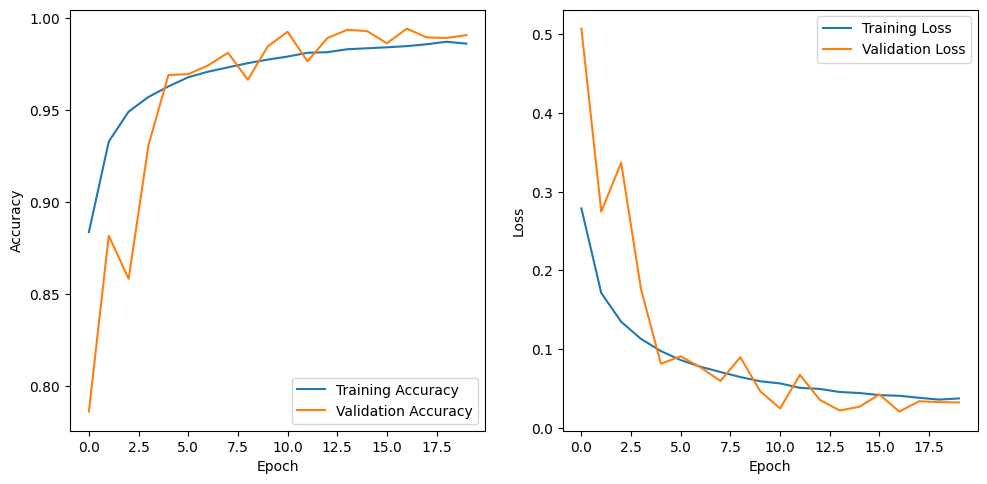

In [225]:
from sklearn.metrics import roc_auc_score
import matplotlib.pyplot as plt
print(roc_auc_score(y_train, cnn_model.predict(X_train)))
print(roc_auc_score(y_test, cnn_model.predict(X_test)))

fig = plt.figure(figsize=(10, 5))
axes1 = fig.add_subplot(1, 2, 1)
axes2 = fig.add_subplot(1, 2, 2)
axes1.set(xlabel='Epoch', ylabel='Accuracy')
axes2.set(xlabel='Epoch', ylabel='Loss')
fig.tight_layout()

axes1.plot(model_fit.history['accuracy'], label='Training Accuracy')
axes1.plot(model_fit.history['val_accuracy'], label='Validation Accuracy')
axes1.legend()

# Plotting loss
axes2.plot(model_fit.history['loss'], label='Training Loss')
axes2.plot(model_fit.history['val_loss'], label='Validation Loss')
axes2.legend()

plt.show()

In [226]:
# Predict on the test data
sub10 = pd.DataFrame()
predictInput = np.asarray(test.iloc[:,1:]).reshape(30917,20,20,1) / 255.0
predictId = test['Id']

sub10['Id'] = predictId  
sub10['Predicted'] = cnn_model.predict(predictInput)

sub10.to_csv('submission10.csv', index=False)

967/967 ━━━━━━━━━━━━━━━━━━━━ 13s 14ms/step
